In [1]:
import gym
import numpy as np
import random
import time
from IPython.display import clear_output

In [14]:
env = gym.make('FrozenLake-v0')

In [15]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size)) # this is out action-value lookup table

In [16]:
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [23]:
num_episodes = 10000 # number of episodes we will be attempting
max_steps_per_episode = 100 # if we exceed this number we will terminate episode

learning_rate = 0.1 # alpha step_size
discount_rate = 0.99 # discout of future rewards

exploration_rate = 1 # just initial, will change
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

In [24]:
rewards_all_episodes = []

# Q-learning algorithm
for episode in range(num_episodes):
    
    # initialize new episode params
    state = env.reset() # first step
    done = False
    rewards_current_episode = 0 # this episodes reward
    
    for step in range(max_steps_per_episode): 
        # Exploration-exploitation trade-off
        # Take new action
        # Update Q-table
        # Set new state
        # Add new reward  
        
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1) # take a sample from this uniform dist
        if exploration_rate_threshold > exploration_rate: # if sample is les
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()
            
        # This line takes a step and assigns values based on the game, in this case its Frozen Lake
        new_state, reward, done, info = env.step(action)
        
        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) \
            + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        
        # Transition to next state
        state = new_state
        rewards_current_episode += reward
        
        # In case we are done
        if done == True: 
            break
    
    
    # Exploration rate decay   
    # Add current episode reward to total rewards list
    
    # Exploration rate decay   
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) \
        * np.exp(-exploration_decay_rate*episode)
    
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)
    

In [25]:
# split into 10 arrays, for every 1000 episodes, becomes a list of lists
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000) 
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.5030000000000003
2000 :  0.6590000000000005
3000 :  0.6720000000000005
4000 :  0.6970000000000005
5000 :  0.6930000000000005
6000 :  0.6830000000000005
7000 :  0.6790000000000005
8000 :  0.6830000000000005
9000 :  0.6790000000000005
10000 :  0.6610000000000005


## Blackjack

### Q-lookup table:

numpy array:

state: number of cards in hand, number dealer is showing, do we have an ace

action: hit or stay

In [2]:
bj = gym.make('Blackjack-v0')

In [3]:
bj.action_space

Discrete(2)

In [4]:
bj.observation_space # 32 is our current total, discrete 11 is dealer showing, discrete 2 is if we have an ace

Tuple(Discrete(32), Discrete(11), Discrete(2))

In [5]:
bj.observation_space[2].n

2

In [6]:
q_lookup_table = np.zeros((bj.observation_space[0].n, bj.observation_space[1].n, bj.observation_space[2].n, 
                         bj.action_space.n))

num_episodes = 100000 # number of episodes we will be attempting
max_steps_per_episode = 10 # if we exceed this number we will terminate episode

learning_rate = 0.01 # alpha step_size
discount_rate = 0.99 # discout of future rewards

exploration_rate = 1 # just initial, will change
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

We will try these parameters again

In [7]:
state = bj.reset()
done = False
rewards_current_episode = 0

action = bj.action_space.sample()

print(action)

new_state, reward, done, info = bj.step(action)

print(new_state, reward, done, info)

1
(24, 2, False) -1 True {}


In [8]:
rewards_all_episodes = []

# Q-learning algorithm
for episode in range(num_episodes):
    
    # initialize new episode params
    state = bj.reset() # first step
    if not episode % 10000:
        print(f'Restart at {state}')
    done = False
    rewards_current_episode = 0 # this episodes reward
    
    for step in range(max_steps_per_episode): 
        # Exploration-exploitation trade-off
        # Take new action
        # Update Q-table
        # Set new state
        # Add new reward  
        
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1) # take a sample from this uniform dist
        if exploration_rate_threshold > exploration_rate: # if sample is les
            action = np.argmax(q_lookup_table[state[0], state[1], int(state[2]),:]) 
            if not episode % 10000:
                print(f'Stratgically chose action {action}')
        else:
            action = bj.action_space.sample() # either hit or stay
            if state[0] < 12:
                action = 1
            if not episode % 10000:
                print(f'Randomly chose action {action}')
        
            
        # This line takes a step and assigns values based on the game
        new_state, reward, done, info = bj.step(action)
        if not episode % 10000:
            print(f'At state: {new_state}, received reward: {reward}, we are done? {done}')
        
        # Update Q-table for Q(s,a)
        if done:
            q_lookup_table[state[0], state[1], int(state[2]), action] = q_lookup_table[state[0], state[1], int(state[2]), action] \
                * (1 - learning_rate) + learning_rate * reward
        else:
            q_lookup_table[state[0], state[1], int(state[2]), action] = q_lookup_table[state[0], state[1], int(state[2]), action] \
                * (1 - learning_rate) + learning_rate * (reward + discount_rate \
                * np.max(q_lookup_table[new_state[0], new_state[1], int(new_state[2]), :]))
        
        if not episode % 10000:
            print(f'new q-value of {state}, {action} is {q_lookup_table[state[0], state[1], int(state[2]), action]}')
        
        # Transition to next state
        state = new_state
        rewards_current_episode += reward
        
        # In case we are done
        if done == True: 
            break
    
    
    # Exploration rate decay   
    # Add current episode reward to total rewards list
    
    # Exploration rate decay   
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) \
        * np.exp(-exploration_decay_rate*episode)
    
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)
    if not episode % 10000:
        print(f'This episode we received {rewards_current_episode}.')

Restart at (20, 10, False)
Randomly chose action 0
At state: (20, 10, False), received reward: 0.0, we are done? True
new q-value of (20, 10, False), 0 is 0.0
This episode we received 0.0.
Restart at (12, 7, False)
Stratgically chose action 1
At state: (17, 7, False), received reward: 0, we are done? False
new q-value of (12, 7, False), 1 is -0.11516445429580913
Stratgically chose action 0
At state: (17, 7, False), received reward: 1.0, we are done? True
new q-value of (17, 7, False), 0 is -0.0791585179232497
This episode we received 1.0.
Restart at (11, 7, False)
Randomly chose action 1
At state: (13, 7, False), received reward: 0, we are done? False
new q-value of (11, 7, False), 1 is 0.04628362067294629
Stratgically chose action 1
At state: (14, 7, False), received reward: 0, we are done? False
new q-value of (13, 7, False), 1 is -0.225885960637012
Stratgically chose action 1
At state: (20, 7, False), received reward: 0, we are done? False
new q-value of (14, 7, False), 1 is -0.1615

In [9]:
# split into 10 arrays, for every 1000 episodes, becomes a list of lists
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000) 
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  -0.2730000000000002
2000 :  -0.20800000000000016
3000 :  -0.17600000000000013
4000 :  -0.09000000000000007
5000 :  -0.06200000000000005
6000 :  -0.11000000000000008
7000 :  -0.08500000000000006
8000 :  -0.09800000000000007
9000 :  -0.08100000000000006
10000 :  -0.1320000000000001
11000 :  -0.12700000000000009
12000 :  -0.11700000000000009
13000 :  -0.11300000000000009
14000 :  -0.10700000000000008
15000 :  -0.10100000000000008
16000 :  -0.07300000000000005
17000 :  -0.058000000000000045
18000 :  -0.05600000000000004
19000 :  -0.10300000000000008
20000 :  -0.10400000000000008
21000 :  -0.035000000000000024
22000 :  -0.04100000000000003
23000 :  -0.03800000000000003
24000 :  -0.08900000000000007
25000 :  -0.06800000000000005
26000 :  -0.1220000000000001
27000 :  -0.04500000000000003
28000 :  -0.10100000000000008
29000 :  -0.047000000000000035
30000 :  -0.04100000000000003
31000 :  -0.04300000000000003
32000 :  -0.0900000000000

In [10]:
print(q_lookup_table[16, 8, 0, 1])
print(q_lookup_table[21, 9, 0, 1])
print(q_lookup_table[21, 3, 1, 0])
print(q_lookup_table[20, 1, 0, 0])

-0.5947764951124034
-0.029700999999999998
0.8705315975431326
0.30699492915307697


In [11]:
print(rewards_all_episodes.count(1))
print(rewards_all_episodes.count(0))
print(rewards_all_episodes.count(-1))

41568
8675
49757


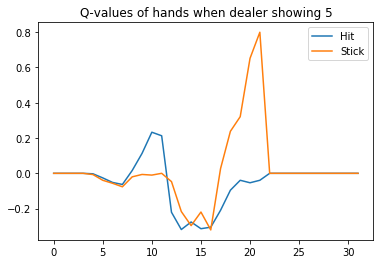

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.arange(bj.observation_space[0].n), q_lookup_table[:, 5, 0, 1], label='Hit')
plt.plot(np.arange(bj.observation_space[0].n), q_lookup_table[:, 5, 0, 0], label='Stick')
plt.title('Q-values of hands when dealer showing 5')
plt.legend()

13.0 -18.0
-122.0


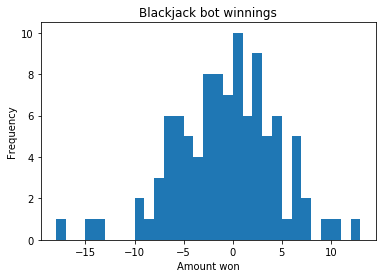

In [24]:
rewards = []
summative_total = 0
for i in range(100):
    total_reward = 0
    num_games = 30

    for game in range(num_games):
        state = bj.reset()
        #print(f'State: {state}')
        for step in range(5):
            action = np.argmax(q_lookup_table[state[0], state[1], int(state[2]), :])
            #print(f'Chose action {action}')
            new_state, reward, done, info = bj.step(action)
            #print(f'Now in state {new_state}')

            if done:
                #print(f'Received reward {reward}')
                total_reward += reward
                break

            state = new_state

    rewards.append(total_reward)
    summative_total += total_reward

print(max(rewards), min(rewards))
bin_amount = max(rewards) - min(rewards)
plt.hist(rewards, bins=int(bin_amount))   
plt.xlabel('Amount won')
plt.ylabel('Frequency')
plt.title('Blackjack bot winnings')
print(summative_total)

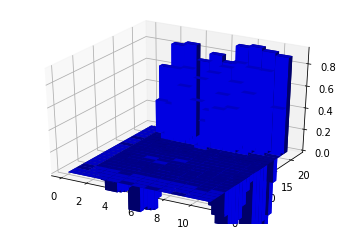

In [44]:
from mpl_toolkits.mplot3d import Axes3D 

# Assuming you have "2D" dataset like the following that you need
# to plot.
#
data_2d = q_lookup_table[:22, :, 0, 0]
#
# Convert it into an numpy array.
#
data_array = np.array(data_2d)
#
# Create a figure for plotting the data as a 3D histogram.
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
#
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data, 'blue' )
#
# Finally, display the plot.
#
plt.show()

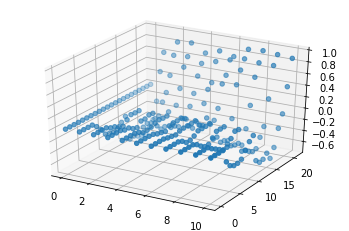

In [45]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_data, y_data, z_data)

In [50]:
ax.bar3d(x_data, y_data, z_data, 0, 0, 0)

In [68]:
# I just wanted to plot my results :(

In [59]:
q_lookup_table[:22, :, 0, 0].shape

(22, 11)